In [9]:
import pandas
import matplotlib.pyplot as plt
from sklearn import preprocessing

data = pandas.read_csv("C:/Users/Toxicr0ak/Documents/tabby_star.csv")
data.describe()

,time_bjd_2454833,flux,uncertainty_1_std_dev,orientation
count,52.000000,52.000000,52.000000,52.000000
mean,763.455077,0.998446,0.002525,1.673077
std,464.959599,0.011660,0.001299,1.149956
min,112.742000,0.974110,0.001500,0.000000
25%,374.475500,0.992167,0.001580,1.000000
50%,735.830000,1.002245,0.001670,2.000000
75%,1160.531750,1.008625,0.002663,3.000000
max,1557.495000,1.010670,0.005050,3.000000


In [10]:
clean = data.drop(["uncertainty_1_std_dev","orientation"],axis = 1)
minmax_scaler = preprocessing.MinMaxScaler()
minmax_clean = minmax_scaler.fit_transform(clean)
minmax_clean = pandas.DataFrame(minmax_clean, columns=["Time","Flux"])
time_data = minmax_clean.drop("Flux",axis=1)
flux_data = minmax_clean.drop("Time",axis=1)

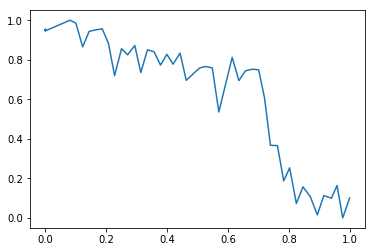

In [11]:
plt.plot(time_data, flux_data)

,Time,Flux
0,0.000000,0.953228
1,0.000087,0.950492
2,0.000191,0.951586
3,0.000341,0.945295
4,0.000413,0.953775
5,0.000559,0.951039
6,0.000686,0.952954
7,0.000986,0.946937
8,0.081040,1.000000
9,0.100546,0.985503


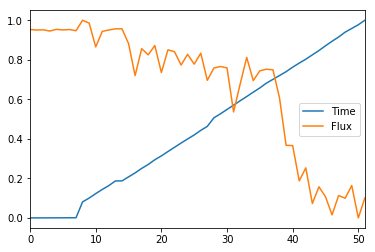

In [12]:
minmax_clean.plot()
minmax_clean

In [13]:
from sklearn.model_selection import train_test_split

time_train, time_test = train_test_split(time_data, test_size=0.2, random_state=69)
flux_train, flux_test = train_test_split(flux_data, test_size=0.2, random_state=69)

In [14]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(time_train, flux_train)
linreg.predict(time_test)

array([[1.07030574],
       [1.0698033 ],
       [0.60894479],
       [0.3284847 ],
       [0.99962031],
       [1.07059154],
       [0.36686055],
       [0.30723241],
       [0.51297422],
       [0.62666363],
       [0.26836079]])

In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np

flux_predictions = linreg.predict(time_data)
prediction_rmse = np.sqrt(mean_squared_error(flux_data, flux_predictions))
print(prediction_rmse)

0.14188648775999096


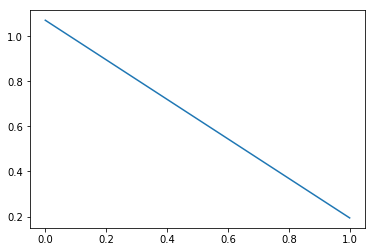

In [16]:
import matplotlib.pyplot as plt
plt.plot(time_data, flux_predictions)

In [17]:
deviant_behaviour = minmax_clean.loc[minmax_clean["Flux"]<0.4]
normal_behaviour = minmax_clean.loc[minmax_clean["Flux"]>0.4]
deviant_flux = deviant_behaviour.drop("Time",axis=1)
deviant_time = deviant_behaviour.drop("Flux",axis=1)
normal_flux = normal_behaviour.drop("Time",axis=1)
normal_time = normal_behaviour.drop("Flux",axis=1)

In [18]:
normal_flux_train, normal_flux_test = train_test_split(normal_flux,test_size=0.2,random_state=19)
normal_time_train, normal_time_test = train_test_split(normal_time,test_size=0.2,random_state=19)
deviant_flux_train, deviant_flux_test = train_test_split(deviant_flux,test_size=0.2,random_state=29)
deviant_time_train, deviant_time_test = train_test_split(deviant_time,test_size=0.2,random_state=29)

In [19]:
norm_linreg = LinearRegression()
norm_linreg.fit(normal_time_train, normal_flux_train)
norm_flux_predictions = norm_linreg.predict(normal_time)
norm_rmse = np.sqrt(mean_squared_error(normal_flux, norm_flux_predictions))
print(norm_rmse)

0.059812236928187074


In [20]:
deviant_flux_predictions_by_normfit = norm_linreg.predict(deviant_time)
deviant_flux_normfit_rmse = np.sqrt(mean_squared_error(deviant_flux, deviant_flux_predictions_by_normfit))
print(deviant_flux_normfit_rmse)

0.4654480360879747


In [21]:
deviant_linreg = LinearRegression()
deviant_linreg.fit(deviant_time_train, deviant_flux_train)
deviant_linreg.predict(deviant_time_test)

array([[ 0.20789579],
       [-0.04767586],
       [ 0.01287197]])

In [22]:
deviant_flux_predictions = deviant_linreg.predict(deviant_time)
deviant_rmse = np.sqrt(mean_squared_error(deviant_flux, deviant_flux_predictions))
print(deviant_rmse)

0.083548651493467
